# FPCC2 - Laboratório 1

Com base no arquivo de dados (no diretório data) responda as questões abaixo, gerando um relatório final com as respostas. Cada resposta deve gerar tabelas e/ou gráficos para apresentar os resultados obtidos, além de uma justificativa para a escolha de métricas, estatísticas e visualizações. Vocês podem se basear no arquivo R Markdown gerado em sala (no diretório reports). O relatório final deve ser adicionado ao repositório do seu lab (por exemplo, um arquivo PDF).

## Questões



In [1]:
#Imports
import pandas
import plotnine
from scipy.stats import ttest_ind
import matplotlib


In [2]:
#Reads
cursos_data = pandas.read_csv('./data/cursos-prouni.csv')
estados_data = pandas.read_csv('./data/estados.csv')

## Q1 
Qual a diferença entre as mensalidades médias e medianas dos cursos de Ciência da Computação das regiões Nordeste e Sudeste? Na sua opinião, essa diferença o que causa essa diferença? Ela é estatisticamente significativa? Justifique.

R: Primeiro, para responder a pergunta, iremos carregar os dados. Utilizaremos estados.csv para fazer a separação das regiões e cursos para pegar as informações de mensalidades dos cursos.

In [3]:
#para responder a questão precisamos de: valor da mensalidade, curso, UF e da lista de estados divididos por regiões

q1_estados = estados_data[["subdivision","region"]].rename(columns={"subdivision":"uf_busca"})
q1_cursos = cursos_data.merge(q1_estados,how='left',on='uf_busca')
q1_cursos = q1_cursos[["mensalidade","curso_busca","cidade_busca","uf_busca","region"]]
q1_cursos = q1_cursos.loc[q1_cursos["curso_busca"]=="Ciência da Computação"]
q1_cursos = q1_cursos.loc[(q1_cursos["region"]=="NE") | (q1_cursos["region"]=="SE")].replace("SE","SUDESTE").replace("NE","NORDESTE")




In [4]:
q1_cursos.groupby(["region"])["mensalidade"].describe()


count        mean         std     min      25%    50%       75%  \
region                                                                      
NORDESTE   31.0  712.734194  243.955031  309.50  520.215  742.8   852.545   
SUDESTE   113.0  899.059381  448.524472  450.54  638.000  779.0  1019.000   

              max  
region             
NORDESTE  1272.62  
SUDESTE   4023.00

Utilizando a função describe temos que no nordeste temos um total de 31 observações e no sudeste temos um total de 113 observações. A média da mensalidade do nordeste é de R\\$ 712.73 , enquanto a média da mensalidade do Sudeste é de R\\$ 899.05, Já a mediana do Nordeste está em 742.80 reais e do sudeste está em 779.00 reais.  **desta forma a diferença entre as médias é de aproximadamente R\\$ 186 e a difrença entre as medianas é de aproximadamente 36 reais**.



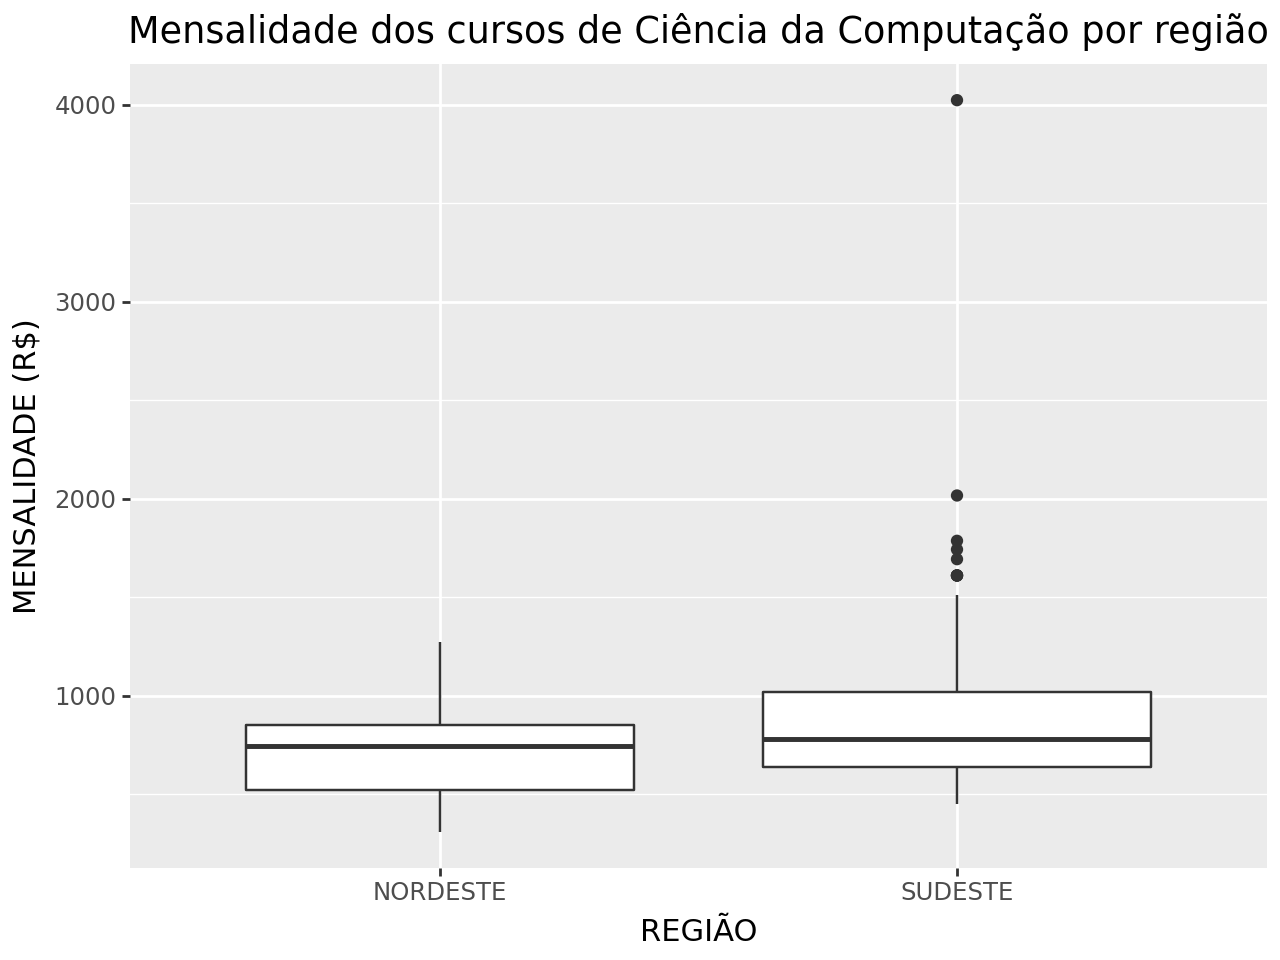

In [5]:


#plotnine.qplot(x='region',y='mensalidade',data=q1_cursos).draw()
(plotnine.ggplot(q1_cursos) + 
     plotnine.aes(x='region',y='mensalidade') + 
     plotnine.geom_boxplot() + 
     plotnine.xlab("REGIÃO") + 
     plotnine.ylab("MENSALIDADE (R$)") +
     plotnine.ggtitle("Mensalidade dos cursos de Ciência da Computação por região")
    )

Para identificar uma das possíveis razões dessa diferença gerei o gráfico de boxplot acima que permite que a gente veja de maneira mais clara como está a distribuição das observações. É possível concluir algumas coisas da tabela de describe, como por exemplo é possível ver que a mediana do sudeste se encontra em um valor um pouco acima do valor do valor do nordeste, o que indica que temos valores maiores, mas visualizando o boxplot é possível ver que temos vários outliers, incluindo o curso mais caro com valor acima de 4000. Além é claro que temos valores em geral superiores aos valores da mediana.

**Então o que explica essa diferença de valores são os valores mais caros das mensalidades na região sudestes e os outliers que ocorrem na região Sudeste.**

Agora para responder se essa diferença é estatisticamente significante, precisamos fazer o teste t de duas amostras entre médias.
Assumimos a hipótese nula H0: NE = SE (Média do nordeste é igual a média do Sudeste)
e temos a hipótese alternativa Ha: NE != SE; (Média do nordeste é diferente da média do sudeste). Para isso então faremos o teste t das médias das regiões agrupadas.

In [6]:

#agrupamos por região
group1 = q1_cursos[q1_cursos['region']=='NORDESTE']
group2 = q1_cursos[q1_cursos['region']=='SUDESTE']

#e fazemos o teste t utilizando mensalidade de cada um dos grupos
ttest_ind(group1['mensalidade'], group2['mensalidade'], equal_var=False)

TtestResult(statistic=-3.0631212709557842, pvalue=0.002884469468782047, df=90.57509300676243)

**Do Teste t obtivemos que o p-valor é de 0.002 ou seja p-valor<0.05, portanto a H0 está rejeitada e de fato há diferença entre as médias das regiões.**

## Q2 
Quais são os top 10 cursos com maior valor de mensalidade pelo total de bolsas (diferentes tipos)? Existe uma relação entre o valor total de mensalidade e o total de bolsas por curso? Justifique.  

R: Acho que a questão pode estar faltando informação, top 10 cursos com maior mensalidade pode significar duas coisas:

1° - Pode significar quais são os top 10 cursos podendo haver repetição.

2° - Pode significar quais são os top 10 cursos sem poder haver repetição.

Se não houver repetição qual seria o método para desconsiderar a repetição? (Pega o primeiro ordenado pela mensalidade e remove os demais daquele curso? Fazendo uma média dentre a mensalidade deles?)

Como para se fazer a 2° há mais de uma possibilidade e parece ser mais errado já que a questão nada fala sobre distinguir cursos repetidos, assumirei que o que está sendo questionado é quais são os top 10 cursos ordenados pela mensalidade sem distinção se há ou não repetição. Então, farei um gráfico de dispersão e depois da análise desse gráfico será feita a análise de correlação.


In [7]:
q2_cursos = cursos_data.fillna(0)
q2_cursos["bolsas_total"] = q2_cursos["bolsa_integral_cotas"] + q2_cursos["bolsa_integral_ampla"] + q2_cursos["bolsa_parcial_cotas"] + q2_cursos["bolsa_parcial_ampla"]
q2_cursos = q2_cursos[["universidade_nome", "curso_busca","bolsas_total","mensalidade"]]
#q2_cursos = pandas.pivot_table(q2_cursos, index=['curso_busca'], values=["bolsas_total","mensalidade"],aggfunc='mean')
q2_cursos.sort_values(by=["mensalidade"], ascending=False).head(10)
#cursos_data


universidade_nome curso_busca  \
0                  Universidade Anhanguera - UNIDERP    Medicina   
1                  Faculdade Princesa do Oeste - FPO  Enfermagem   
2          Universidade Cidade de São Paulo - UNICID    Medicina   
3                  Faculdade Princesa do Oeste - FPO  Psicologia   
4                Faculdade Barão do Rio Branco - FAB    Medicina   
5           Universidade do Oeste Paulista - UNOESTE    Medicina   
6                   Universidade de Marília - UNIMAR    Medicina   
7  Centro Universitário Presidente Tancredo de Al...    Medicina   
8                Universidade de Cuiabá - UNIC/UNIME    Medicina   
9    Faculdade de Ciências Agrárias e da Saúde - FAS    Medicina   

   bolsas_total  mensalidade  
0          29.0      9999.99  
1           1.0      9836.40  
2          23.0      9715.61  
3           5.0      9689.34  
4          12.0      9674.34  
5          23.0      9650.00  
6           8.0      9564.00  
7           7.0      9350.00  
8          12.0      9208.00  
9          17.0      9048.00

Os top 10 cursos com maior valor de mensalidade são estes apresentados acima, com mensalidade variando de 9048 reais até 9999.99 reais, sendo eles de medicina, enfermagem e psicologia nas universidades listadas na tabela acima. Agora apresentarei o gráfico de dispersão:


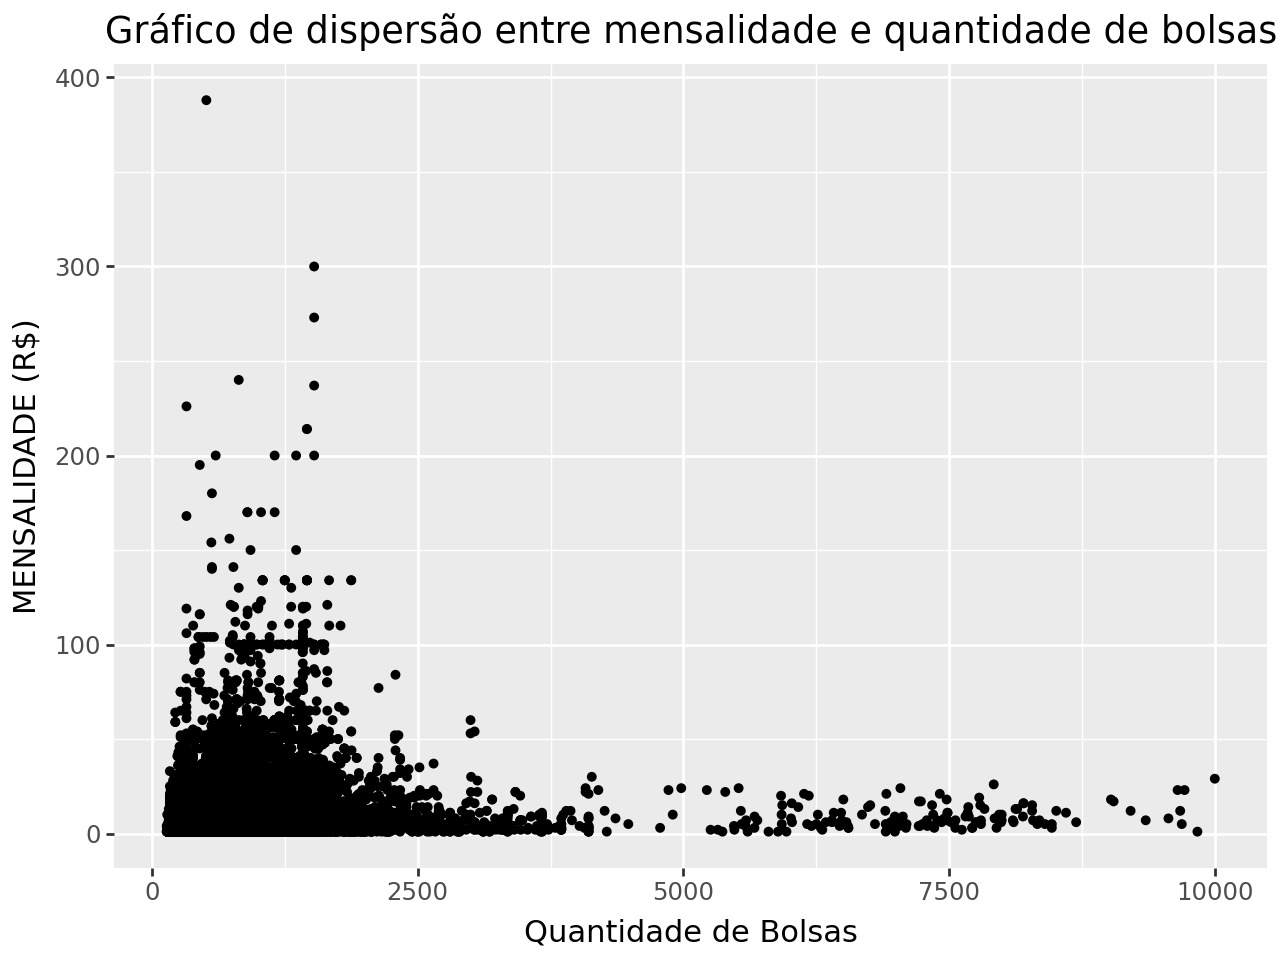

In [8]:
(plotnine.ggplot(q2_cursos) + 
 plotnine.aes(x='mensalidade',y='bolsas_total') + 
 plotnine.geom_point(size = 1) + 
 plotnine.xlab("Quantidade de Bolsas") + 
 plotnine.ylab("MENSALIDADE (R$)") +
 plotnine.ggtitle("Gráfico de dispersão entre mensalidade e quantidade de bolsas")
)

Pelo gráfico já não parece existir correlação positiva ou negativa entre a quantidade total de bolsas e a mensalidade do curso. Fazendo agora o cálculo de correlação:

In [9]:
q2_cursos.corr(method='pearson', min_periods=1, numeric_only=True)

bolsas_total  mensalidade
bolsas_total      1.000000     0.216228
mensalidade       0.216228     1.000000

**A correlação utilizando o método de pearson indica uma correlação de 0.21, ou seja uma correlação negligenciável. Não há correlação entre o valor e a quantidade de bolsas.**

Q3 - Quais são os cursos tecnológicos do estado da Paraíba que oferecem mais bolsas de estudo e quantas bolsas de cada tipo estes cursos oferecem?

In [10]:
#filtra por tecnologo e pb
q3_cursos = cursos_data.loc[(cursos_data["grau"]=="Tecnológico") & (cursos_data["uf_busca"] == "PB")].fillna(0)
#adiciona campo de total de bolsas para fazer o sorting
q3_cursos['bolsas_total'] = q3_cursos["bolsa_integral_cotas"] + q3_cursos["bolsa_integral_ampla"] + q3_cursos["bolsa_parcial_cotas"] + q3_cursos["bolsa_parcial_ampla"]
#filtra somente as colunas relevantes para a pergunta
q3_cursos = q3_cursos[["curso_busca","bolsa_integral_cotas","bolsa_integral_ampla","bolsa_parcial_cotas","bolsa_parcial_ampla","bolsas_total"]]
#soma observações repetidas
q3_cursos = pandas.pivot_table(q3_cursos, index=['curso_busca'], values=["bolsa_integral_cotas","bolsa_integral_ampla","bolsa_parcial_cotas","bolsa_parcial_ampla","bolsas_total"],aggfunc='sum')
#ordena pelo total de bolsas e printa na tela uma tabela ordenada
q3_cursos.sort_values(by=["bolsas_total"], ascending=False).head(10)


bolsa_integral_ampla  \
curso_busca                                                
Gestão de Recursos Humanos                          20.0   
Segurança no Trabalho                                7.0   
Redes de Computadores                               10.0   
Gestão da Tecnologia da Informação                   6.0   
Negócios Imobiliários                                4.0   
Logística                                            3.0   
Radiologia                                          30.0   
Design de Interiores                                10.0   
Marketing                                            8.0   
Gestão Comercial                                     5.0   

                                    bolsa_integral_cotas  bolsa_parcial_ampla  \
curso_busca                                                                     
Gestão de Recursos Humanos                          31.0                 70.0   
Segurança no Trabalho                               11.0                 91.0   
Redes de Computadores                               16.0                 80.0   
Gestão da Tecnologia da Informação                  12.0                 80.0   
Negócios Imobiliários                                6.0                 85.0   
Logística                                            9.0                 67.0   
Radiologia                                          12.0                 10.0   
Design de Interiores                                13.0                 30.0   
Marketing                                           15.0                  0.0   
Gestão Comercial                                    14.0                  3.0   

                                    bolsa_parcial_cotas  bolsas_total  
curso_busca                                                            
Gestão de Recursos Humanos                          3.0         124.0  
Segurança no Trabalho                               1.0         110.0  
Redes de Computadores                               0.0         106.0  
Gestão da Tecnologia da Informação                  1.0          99.0  
Negócios Imobiliários                               0.0          95.0  
Logística                                           1.0          80.0  
Radiologia                                          1.0          53.0  
Design de Interiores                                0.0          53.0  
Marketing                                           4.0          27.0  
Gestão Comercial                                    5.0          27.0

R: Como é possível ver na tabela acima, listei os top 10 cursos com mais bolsas juntamente com a quantidade de cada tipo de bolsa oferecida por estes cursos.

E.g. Temos que o curso com mais bolsas é o de Gestão de Recursos Humanos possui 20 bolsas integral para ampla, 31 integral cotas, 70 parcial ampla e 3 parcial cotas, totalizando 124 bolsas.

As demais podem ser observadas na tabela acima.

## Q4
Considerando os cursos de Ciência da Computação, Engenharia da Computação e Sistemas de Informação, qual o percentual de bolsas ofertadas para cada modalidade (a distância, integral, noturno, etc.) por cada um dos cursos? Existe uma modalidade que é predominante?

R:


In [11]:
#filtra por tecnologo e pb
q4_cursos = cursos_data.loc[(cursos_data["curso_busca"]=="Ciência da Computação") | (cursos_data["curso_busca"]=="Engenharia da Computação") | (cursos_data["curso_busca"]=="Sistemas de Informação")].fillna(0)
q4_cursos["bolsas_total"] = q4_cursos["bolsa_integral_cotas"] + q4_cursos["bolsa_integral_ampla"] + q4_cursos["bolsa_parcial_cotas"] + q4_cursos["bolsa_parcial_ampla"]
q4_cursos = q4_cursos[["turno","curso_busca","bolsas_total"]]
q4_cursos = pandas.pivot_table(q4_cursos, index=['curso_busca','turno'], values=["bolsas_total"],aggfunc='sum')
q4_cursos = q4_cursos.reset_index()
q4_cursos["porcentagem por curso (0~100)"] = q4_cursos.bolsas_total / q4_cursos.groupby(["curso_busca"]).bolsas_total.transform('sum') * 100


q4_cursos


curso_busca              turno  bolsas_total  \
0      Ciência da Computação           Integral          20.0   
1      Ciência da Computação           Matutino         384.0   
2      Ciência da Computação            Noturno        1169.0   
3      Ciência da Computação         Vespertino          17.0   
4   Engenharia da Computação           Integral          22.0   
5   Engenharia da Computação           Matutino          19.0   
6   Engenharia da Computação            Noturno          80.0   
7     Sistemas de Informação  Curso a Distância          95.0   
8     Sistemas de Informação           Matutino         260.0   
9     Sistemas de Informação            Noturno        1514.0   
10    Sistemas de Informação         Vespertino          56.0   

    porcentagem por curso (0~100)  
0                        1.257862  
1                       24.150943  
2                       73.522013  
3                        1.069182  
4                       18.181818  
5                       15.702479  
6                       66.115702  
7                        4.935065  
8                       13.506494  
9                       78.649351  
10                       2.909091

Como é Possível ver na tabela temos as porcentagens divididas por curso. É possível ver que para o turno noturno temos uma modalidade de bolsa predominante.

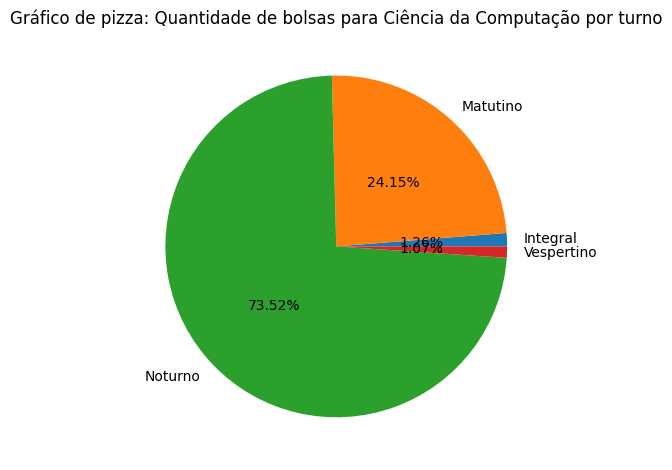

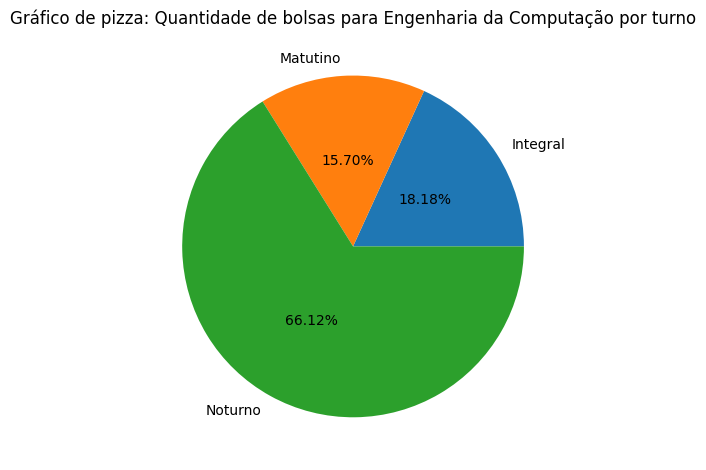

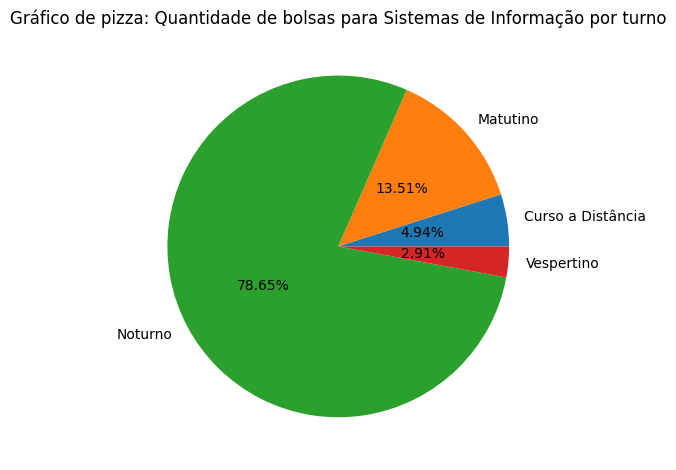

In [12]:
'''
(plotnine.ggplot(qplot) + 
 plotnine.aes(x='turno',y='porcentagem') + 
 plotnine.xlab("Turno") + 
 plotnine.ylab("Total de bolsas") +
 plotnine.ggtitle("Gráfico de pizza do curso") +
 plotnine.coord_polar("y", start=0)
)
'''

qplot = q4_cursos.loc[ (q4_cursos["curso_busca"] == "Ciência da Computação")]
qplot.plot(kind="pie",y='bolsas_total', legend=False, shadow=False, pctdistance=.5, autopct='%1.2f%%', labels=qplot["turno"].values,title = "Gráfico de pizza: Quantidade de bolsas para Ciência da Computação por turno").set(xlabel="", ylabel="")
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

qplot = q4_cursos.loc[ (q4_cursos["curso_busca"] == "Engenharia da Computação")]
qplot.plot(kind="pie",y='bolsas_total', legend=False, shadow=False, pctdistance=.5, autopct='%1.2f%%', labels=qplot["turno"].values,title = "Gráfico de pizza: Quantidade de bolsas para Engenharia da Computação por turno").set(xlabel="", ylabel="")
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

qplot = q4_cursos.loc[ (q4_cursos["curso_busca"] == "Sistemas de Informação")]
qplot.plot(kind="pie",y='bolsas_total', legend=False, shadow=False, pctdistance=.5, autopct='%1.2f%%', labels=qplot["turno"].values,title = "Gráfico de pizza: Quantidade de bolsas para Sistemas de Informação por turno").set(xlabel="", ylabel="")
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()




**A partir dos gráficos de pizza é possível ver que independente do curso, a quantidade de bolsas maior é predominantemente para o turno noturno. Chegando a ter inclusive uma porcentagem maior que 60% independente do curso**